In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn.model_selection as skl

In [229]:
df_class1 = pd.read_csv("./Data/Classification/LS_Group03/Class1.txt", header = None, names = ["x", "y"], sep = ' ')
df_class2 = pd.read_csv("./Data/Classification/LS_Group03/Class2.txt", header = None, names = ["x", "y"], sep = ' ')
df_class3 = pd.read_csv("./Data/Classification/LS_Group03/Class3.txt", header = None, names = ["x", "y"], sep = ' ')
cls1_data_train, cls1_data_test = skl.train_test_split(df_class1, test_size = 0.3, train_size = 0.7)
cls2_data_train, cls2_data_test = skl.train_test_split(df_class2, test_size = 0.3, train_size = 0.7)
cls3_data_train, cls3_data_test = skl.train_test_split(df_class3, test_size = 0.3, train_size = 0.7)
all_data = pd.concat([df_class1,df_class2,df_class3])

In [253]:
def sigmoid(w,b,x):
    res = 1.0 /(1 + np.exp(-(np.dot(w.T,x)[0] + b)))
    return res

def grad_w(w,b,x,y):
    f = sigmoid(w,b,x)
    return (f - y) * f * (1 - f) * x

def grad_b(w,b,x,y):
    f = sigmoid(w,b,x)
    return (f - y) * f * (1 - f)

def predict(w,b,x):
    y = sigmoid(w, b, x)
    if y < 0.5:
        return 0
    else:
        return 1
    
def grad_desc(c1,c2):
    itr = 0
    eta = 0.0001
    epochs = 1000
    W = np.random.rand(1,c1.shape[1]-1).T
    B = np.random.rand()
    
    # print(W.shape)
    
    errors = []
    
    while itr < epochs:
        dw = 0
        db = 0
        cnt_err = 0
        
        c1["class"] = 1
        c2["class"] = 0
        all_data = pd.concat([c1,c2]).sample(frac=1).reset_index(drop=True)
        
        Class = all_data.pop("class")
        
        for i in range(all_data.shape[0]):
            x = np.array(all_data.iloc[i]).reshape(2,1)
            y = Class.iloc[i]
            
            dw += grad_w(W,B,x,y)
            db += grad_b(W,B,x,y)
            cnt_err += 1 if predict(W,B,x) != y else 0
            
        
        W = W - eta * dw
        B = B - eta * db

        errors.append(cnt_err)
        if(cnt_err == 0):
            break
        
        print("Epoch:",itr, "Error=> ", (cnt_err * 100)/(all_data.shape[0]), "%")
        itr+=1
            
    
    plt.bar(x = np.arange(1, len(errors)+1), height = errors)
    plt.xlabel('epoch')
    plt.ylabel('misclassification count')  
    
    return W,B

Epoch: 0 Error=>  35.6 %
Epoch: 1 Error=>  21.0 %
Epoch: 2 Error=>  10.8 %
Epoch: 3 Error=>  5.4 %
Epoch: 4 Error=>  3.3 %
Epoch: 5 Error=>  2.1 %
Epoch: 6 Error=>  1.3 %
Epoch: 7 Error=>  0.9 %
Epoch: 8 Error=>  0.8 %
Epoch: 9 Error=>  0.5 %
Epoch: 10 Error=>  0.5 %
Epoch: 11 Error=>  0.4 %
Epoch: 12 Error=>  0.4 %
Epoch: 13 Error=>  0.4 %
Epoch: 14 Error=>  0.4 %
Epoch: 15 Error=>  0.4 %
Epoch: 16 Error=>  0.4 %
Epoch: 17 Error=>  0.3 %
Epoch: 18 Error=>  0.3 %
Epoch: 19 Error=>  0.3 %
Epoch: 20 Error=>  0.3 %
Epoch: 21 Error=>  0.3 %
Epoch: 22 Error=>  0.3 %
Epoch: 23 Error=>  0.3 %
Epoch: 24 Error=>  0.3 %
Epoch: 25 Error=>  0.3 %
Epoch: 26 Error=>  0.3 %
Epoch: 27 Error=>  0.2 %
Epoch: 28 Error=>  0.2 %
Epoch: 29 Error=>  0.2 %
Epoch: 30 Error=>  0.2 %
Epoch: 31 Error=>  0.2 %
Epoch: 32 Error=>  0.2 %
Epoch: 33 Error=>  0.2 %
Epoch: 34 Error=>  0.2 %
Epoch: 35 Error=>  0.2 %
Epoch: 36 Error=>  0.2 %
Epoch: 37 Error=>  0.2 %
Epoch: 38 Error=>  0.2 %
Epoch: 39 Error=>  0.2 %
Epoch: 

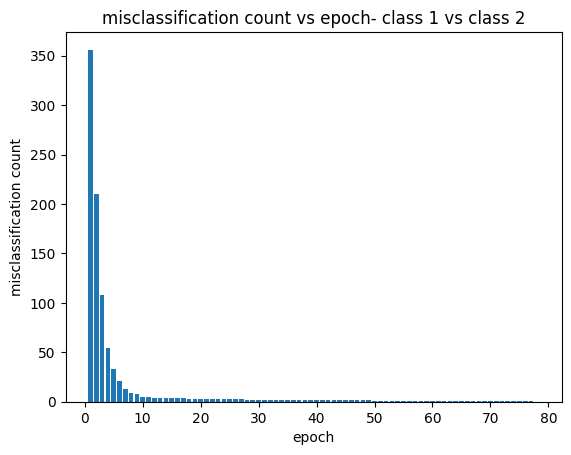

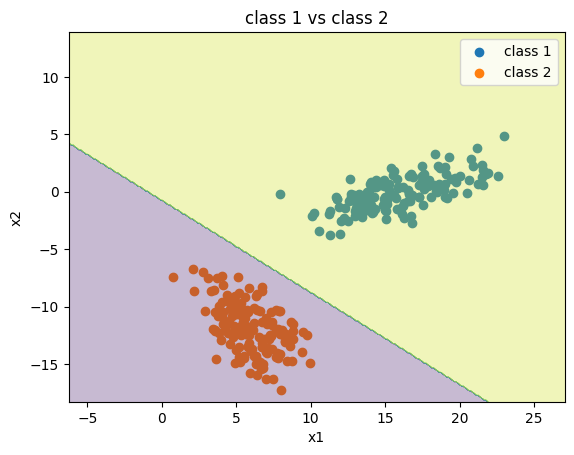

In [259]:
# Class1 vs Class2
w, b = grad_desc(df_class1,df_class2)
plt.title('misclassification count vs epoch- class 1 vs class 2')
plt.show()

# create a mesh to plot in
x_min, x_max = all_data.iloc[:, 0].min() - 1, all_data.iloc[:, 0].max() + 1
y_min, y_max = all_data.iloc[:, 1].min() - 1, all_data.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, axes = plt.subplots()
axes.scatter(cls1_data_test['x'], cls1_data_test['y'], label = 'class 1')
axes.scatter(cls2_data_test['x'], cls2_data_test['y'], label = 'class 2')

# Prediction using perceptron model
Z = np.array([predict(w, b, x) for x in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

plt.title('class 1 vs class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

Epoch: 0 Error=>  86.9 %
Epoch: 1 Error=>  86.9 %
Epoch: 2 Error=>  86.9 %
Epoch: 3 Error=>  86.7 %
Epoch: 4 Error=>  86.7 %
Epoch: 5 Error=>  86.5 %
Epoch: 6 Error=>  86.2 %
Epoch: 7 Error=>  86.1 %
Epoch: 8 Error=>  86.1 %
Epoch: 9 Error=>  86.0 %
Epoch: 10 Error=>  86.0 %
Epoch: 11 Error=>  86.0 %
Epoch: 12 Error=>  86.0 %
Epoch: 13 Error=>  86.0 %
Epoch: 14 Error=>  85.9 %
Epoch: 15 Error=>  85.8 %
Epoch: 16 Error=>  85.7 %
Epoch: 17 Error=>  85.4 %
Epoch: 18 Error=>  85.3 %
Epoch: 19 Error=>  85.0 %
Epoch: 20 Error=>  84.9 %
Epoch: 21 Error=>  84.8 %
Epoch: 22 Error=>  84.7 %
Epoch: 23 Error=>  84.3 %
Epoch: 24 Error=>  84.2 %
Epoch: 25 Error=>  84.2 %
Epoch: 26 Error=>  83.9 %
Epoch: 27 Error=>  83.5 %
Epoch: 28 Error=>  82.9 %
Epoch: 29 Error=>  82.2 %
Epoch: 30 Error=>  81.1 %
Epoch: 31 Error=>  78.6 %
Epoch: 32 Error=>  57.0 %
Epoch: 33 Error=>  27.0 %
Epoch: 34 Error=>  20.6 %
Epoch: 35 Error=>  18.4 %
Epoch: 36 Error=>  16.9 %
Epoch: 37 Error=>  16.0 %
Epoch: 38 Error=>  14.

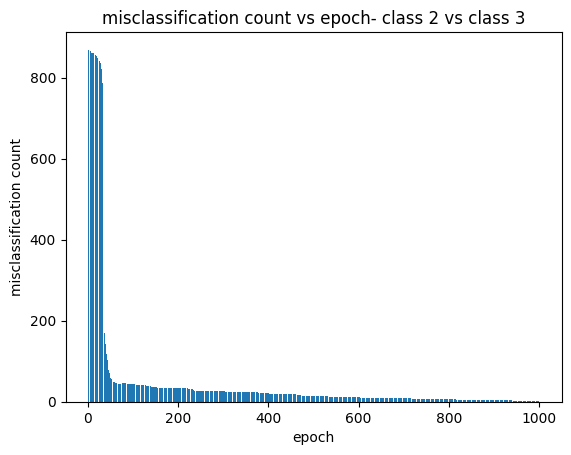

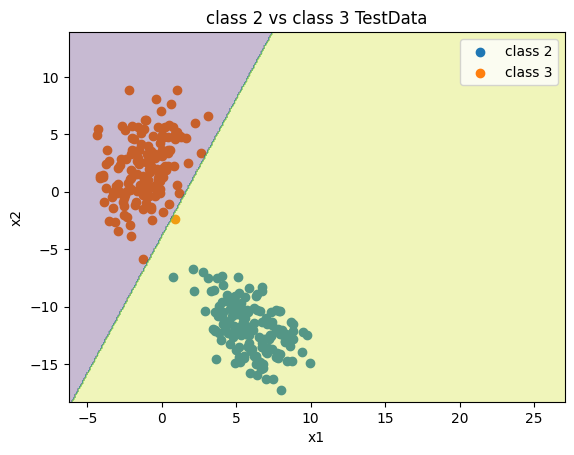

In [260]:
# Class1 vs Class2
w, b = grad_desc(df_class2,df_class3)
plt.title('misclassification count vs epoch- class 2 vs class 3')
plt.show()

# create a mesh to plot in
x_min, x_max = all_data.iloc[:, 0].min() - 1, all_data.iloc[:, 0].max() + 1
y_min, y_max = all_data.iloc[:, 1].min() - 1, all_data.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, axes = plt.subplots()
axes.scatter(cls2_data_test['x'], cls2_data_test['y'], label = 'class 2')
axes.scatter(cls3_data_test['x'], cls3_data_test['y'], label = 'class 3')

# Prediction using perceptron model
Z = np.array([predict(w, b, x) for x in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

plt.title('class 2 vs class 3 TestData')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()